<a href="https://colab.research.google.com/github/Rohan5076/practice-code/blob/main/scivers_trail_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# building model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import tensorflow as tf

In [4]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras

In [5]:
 base_model=InceptionV3(input_shape=(1080,1920,3),include_top=False)

87910968/87910968 [==============================] - 5s 0us/step


In [6]:
for layers in base_model.layers:
  layers.trainable=False

In [18]:
X=Flatten()(base_model.output)
X=Dense(units=2,activation='sigmoid')(X)

#final model
model=Model(base_model.input,X)

#compile the model

model.compile(optimizer = "adam",loss='binary_crossentropy',metrics=['accuracy'])

#summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1080, 1920,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, 539, 959, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 539, 959, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [20]:
train_datagen=ImageDataGenerator(featurewise_center=True,
                               rotation_range=0.4,
                               width_shift_range=0.3,
                               horizontal_flip=True,
                               preprocessing_function=preprocess_input,
                               zoom_range=0.4,
                               shear_range=0.4)
train_data=train_datagen.flow_from_directory(directory ="/content/drive/MyDrive/assignment scivers/train/train1",
                                             target_size=(1080,1920),
                                             batch_size=2)

Found 90 images belonging to 2 classes.


In [21]:
 train_data.class_indices

{'negative': 0, 'positive': 1}

In [22]:
 t_img1,label=train_data.next()

In [23]:
t_img1.shape

(2, 1080, 1920, 3)

In [24]:
def plotImages(img_arr,label):
  """
  input : image array
  output: plot images
  """
  for idx,img  in enumerate(img_arr):
    if idx <= 10:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()

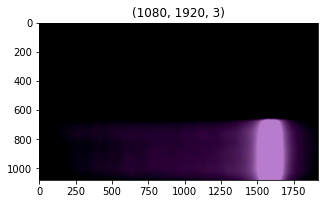

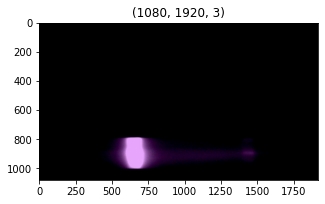

In [25]:
plotImages(t_img1,label)

In [26]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="accuracy",
                   verbose=1,
                   save_best_only=True)
es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1)
cb=[mc,es]

In [27]:
his=model.fit_generator(train_data,
                        steps_per_epoch=10,
                        epochs=30,
                        callbacks=cb)

<ipython-input-27-4c722507cfa1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 33.5387 - accuracy: 0.6500
Epoch 1: accuracy improved from -inf to 0.65000, saving model to ./best_model.h5
10/10 [==============================] - 13s 901ms/step - loss: 33.5387 - accuracy: 0.6500
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 32.4961 - accuracy: 0.6000
Epoch 2: accuracy did not improve from 0.65000
10/10 [==============================] - 9s 847ms/step - loss: 32.4961 - accuracy: 0.6000
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 31.2507 - accuracy: 0.7000
Epoch 3: accuracy improved from 0.65000 to 0.70000, saving model to ./best_model.h5
10/10 [==============================] - 10s 974ms/step - loss: 31.2507 - accuracy: 0.7000
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 36.3169 - accuracy: 0.6000
Epoch 4: accuracy did not improve from 0.70000
10/10 [==============================] - 9s 849ms/step - loss: 36.3169 - accuracy: 0.6000

In [28]:
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [29]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy'])

<function matplotlib.pyplot.show(*args, **kw)>

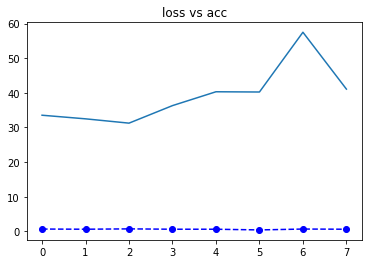

In [31]:
plt.plot(h['loss'])
plt.plot(h['accuracy'],'go--',c="blue")

plt.title("loss vs acc")
plt.show